In [0]:
#!unzip air-pollution-in-seoul.zip

In [14]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [16]:
# Retriving data for station code 101 for NO2
data_101=data[(data['Station code']==101) & (data['NO2']>0)]
print(len(data_101))
print(data_101.head(10))

25852
   Measurement date  Station code  ...  PM10  PM2.5
0  2017-01-01 00:00           101  ...  73.0   57.0
1  2017-01-01 01:00           101  ...  71.0   59.0
2  2017-01-01 02:00           101  ...  70.0   59.0
3  2017-01-01 03:00           101  ...  70.0   58.0
4  2017-01-01 04:00           101  ...  69.0   61.0
5  2017-01-01 05:00           101  ...  70.0   61.0
6  2017-01-01 06:00           101  ...  66.0   57.0
7  2017-01-01 07:00           101  ...  71.0   60.0
8  2017-01-01 08:00           101  ...  72.0   60.0
9  2017-01-01 09:00           101  ...  74.0   63.0

[10 rows x 11 columns]


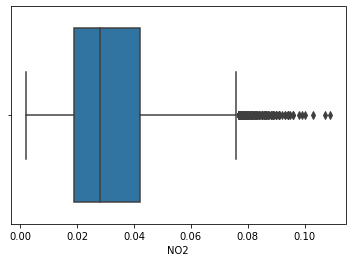

In [17]:
import seaborn as sns
sns.boxplot(data_101['NO2'])

25695


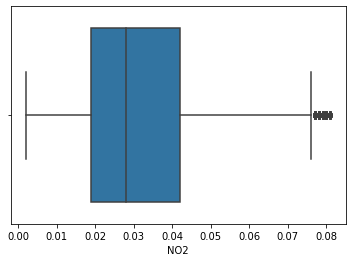

In [18]:
from scipy import stats
z = np.abs(stats.zscore(data_101['NO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_101_Rout = data_101[(z < 3)]
print(len(data_101_Rout))
sns.boxplot(data_101_Rout['NO2'])

In [19]:
df=data_101_Rout['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25695, 1)


In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.002] [0.081]
25695
0.0 1.0000000000000002


In [21]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25690 [0.7215189873417722, 0.7088607594936708, 0.6835443037974682, 0.6835443037974682, 0.620253164556962]


In [22]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25690, 5)


,x1,x2,x3,x4,y
0,0.721519,0.708861,0.683544,0.683544,0.620253
1,0.708861,0.683544,0.683544,0.620253,0.556962
2,0.683544,0.683544,0.620253,0.556962,0.594937
3,0.683544,0.620253,0.556962,0.594937,0.544304
4,0.620253,0.556962,0.594937,0.544304,0.569620
5,0.556962,0.594937,0.544304,0.569620,0.569620
6,0.594937,0.544304,0.569620,0.569620,0.544304
7,0.544304,0.569620,0.569620,0.544304,0.582278
8,0.569620,0.569620,0.544304,0.582278,0.658228
9,0.569620,0.544304,0.582278,0.658228,0.607595


In [23]:
print(matrix[:,4])

[[0.62025316]
 [0.55696203]
 [0.59493671]
 ...
 [0.27848101]
 [0.15189873]
 [0.25316456]]


In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8478, 1) [[0.45240325]
 [0.86809662]
 [0.27086184]
 [0.68859452]
 [0.39026914]]


In [25]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8745914931921531
[0.02993688]
[[ 0.01813187  0.01561923 -0.24669564  1.13265646]]


In [26]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.005453106760006582
absolute mean error :  0.05241557733865343
0.8678854298901655


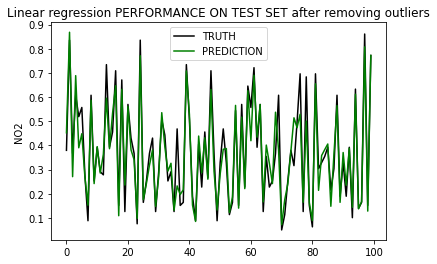

In [27]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('NO2')
plt.legend()
plt.show()

(25852, 1)
[0.002] [0.109]
25852
0.0 1.0
25847 [0.5327102803738318, 0.5233644859813084, 0.5046728971962616, 0.5046728971962616, 0.45794392523364486]
(8530, 1) [[0.29152841]
 [0.10025667]
 [0.39210197]
 [0.27021947]
 [0.52249391]]
mean squared eror :  0.002964446394348903
absolute mean error :  0.038285621001339115
0.8756129586621411


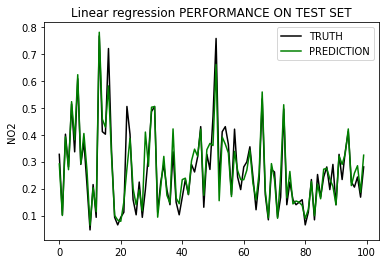

In [28]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_101['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [29]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.002964443436266508
absolute mean error :  0.038286239749233904
0.8756130827821513


In [30]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.002985970147068371
absolute mean error :  0.0385046624720375
0.8747098301979643


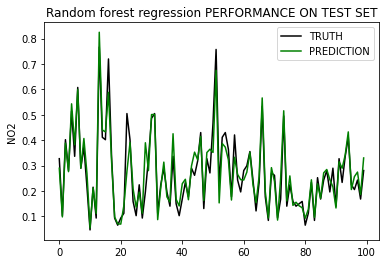

truth :  [[0.3271028 ]
 [0.10280374]
 [0.40186916]
 [0.28037383]
 [0.51401869]
 [0.3364486 ]
 [0.60747664]
 [0.28971963]
 [0.37383178]
 [0.21495327]]
prediction :  [0.28954975 0.09790416 0.38852652 0.27605588 0.54303142 0.38179538
 0.59928069 0.28917814 0.40662576 0.2682676 ]


In [31]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [32]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0029662703556148635
0.03837021188115782
0.8755364259422982


In [33]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.00300258126397488
absolute mean error :  0.0380772683621291
0.8740128340609262


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


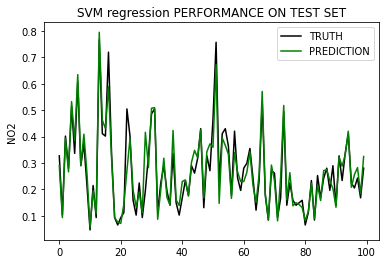

In [34]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [35]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Using TensorFlow backend.


Epoch 1/100
17317/17317 [==============================] - 1s 80us/step - loss: 0.0119 - accuracy: 2.8873e-04
Epoch 2/100
17317/17317 [==============================] - 1s 63us/step - loss: 0.0030 - accuracy: 2.8873e-04
Epoch 3/100
17317/17317 [==============================] - 1s 65us/step - loss: 0.0030 - accuracy: 2.8873e-04
Epoch 4/100
17317/17317 [==============================] - 1s 64us/step - loss: 0.0030 - accuracy: 2.8873e-04
Epoch 5/100
17317/17317 [==============================] - 1s 63us/step - loss: 0.0030 - accuracy: 2.8873e-04
Epoch 6/100
17317/17317 [==============================] - 1s 64us/step - loss: 0.0029 - accuracy: 2.8873e-04
Epoch 7/100
17317/17317 [==============================] - 1s 62us/step - loss: 0.0030 - accuracy: 2.8873e-04
Epoch 8/100
17317/17317 [==============================] - 1s 63us/step - loss: 0.0030 - accuracy: 2.8873e-04
Epoch 9/100
17317/17317 [==============================] - 1s 64us/step - loss: 0.0029 - accuracy: 2.8873e-04
Epoch 10/1

dict_keys(['loss', 'accuracy'])


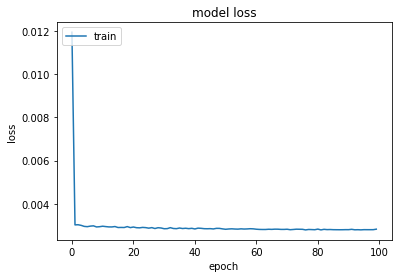

mean squared error :  0.002938136812936306
mean absolute error :  0.0380772683621291
0.8740128340609262


In [36]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


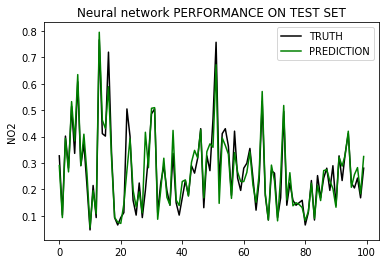

In [37]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [38]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.17757009 0.20560748 0.25233645 0.35514019]
 [0.1682243  0.1682243  0.12149533 0.12149533]
 [0.38317757 0.43925234 0.38317757 0.29906542]
 ...
 [0.1682243  0.14953271 0.01869159 0.21495327]
 [0.58878505 0.58878505 0.55140187 0.57943925]
 [0.57943925 0.6728972  0.59813084 0.56074766]]
(17317, 4)
(17317, 4, 1)


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17317/17317 [==============================] - 7s 428us/step - loss: 0.0109
Epoch 2/100
17317/17317 [==============================] - 6s 357us/step - loss: 0.0035
Epoch 3/100
17317/17317 [==============================] - 6s 350us/step - loss: 0.0031
Epoch 4/100
17317/17317 [==============================] - 6s 348us/step - loss: 0.0030
Epoch 5/100
17317/17317 [==============================] - 6s 351us/step - loss: 0.0030
Epoch 6/100
17317/17317 [==============================] - 6s 353us/step - loss: 0.0030
Epoch 7/100
17317/17317 [==============================] - 6s 349us/step - loss: 0.0030
Epoch 8/100
17317/17317 [==============================] - 6s 345us/step - loss: 0.0030
Epoch 9/100
17317/17317 [==============================] - 6s 364us/step - loss: 0.0030
Epoch 10/100
17317/17317 [==============================] - 6s 356us/step - loss: 0.0030
Epoch 11/100
17317/17317 [==============================] - 6s 354us/step - loss: 0.0030
Epoch 12/100
17317/17317 [====

dict_keys(['loss'])


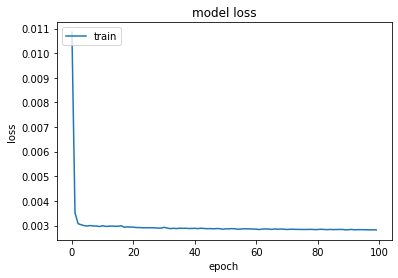

mean square error : 0.002970139884585749
mean absolute error :  0.038155859433222854
0.8753740619808594


In [40]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

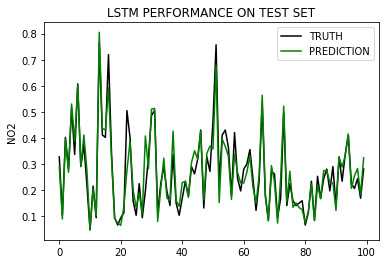

In [41]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')